In [1]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.set_random_seed(2019)

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (180,180,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(550,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.1,seed = 2019),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.3,seed = 2019),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(2,activation = "softmax")   #Adding the Output Layer
])

2022-07-26 07:34:27.077214: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       7

In [4]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
adam=Adam(lr=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [5]:
bs=30         #Setting batch size
train_dir = "../input/cat-and-dog/"   #Setting training directory
validation_dir = "../input/cat-and-dog/"   #Setting testing directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
# Flow training images in batches of 20 using train_datagen generator
#Flow_from_directory function lets the classifier directly identify the labels from the name of the directories the image lies in
train_generator=train_datagen.flow_from_directory(train_dir,batch_size=bs,class_mode='categorical',target_size=(180,180))
# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=bs,
                                                         class_mode  = 'categorical',
                                                         target_size=(180,180))

Found 10028 images belonging to 2 classes.
Found 10028 images belonging to 2 classes.


In [6]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=150 // bs,
                    epochs=10,
                    validation_steps=50 // bs,
                    )

2022-07-26 07:34:36.232057: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
5/5 [==============================] - 4s 646ms/step - loss: 0.6307 - acc: 0.6467 - val_loss: 0.5996 - val_acc: 0.7333
Epoch 2/10
5/5 [==============================] - 3s 559ms/step - loss: 0.5974 - acc: 0.7600 - val_loss: 0.5378 - val_acc: 0.7667
Epoch 3/10
5/5 [==============================] - 3s 547ms/step - loss: 0.5355 - acc: 0.7867 - val_loss: 0.4170 - val_acc: 0.8667
Epoch 4/10
5/5 [==============================] - 3s 558ms/step - loss: 0.5941 - acc: 0.7600 - val_loss: 0.5542 - val_acc: 0.7667
Epoch 5/10
5/5 [==============================] - 3s 546ms/step - loss: 0.6018 - acc: 0.7200 - val_loss: 0.5974 - val_acc: 0.7667
Epoch 6/10
5/5 [==============================] - 3s 587ms/step - loss: 0.5111 - acc: 0.8133 - val_loss: 0.5193 - val_acc: 0.8333
Epoch 7/10
5/5 [==============================] - 3s 531ms/step - loss: 0.5645 - acc: 0.8000 - val_loss: 0.5731 - val_acc: 0.7667
Epoch 8/10
5/5 [==============================] - 3s 548ms/step - loss: 0.5695 - acc: 0.78

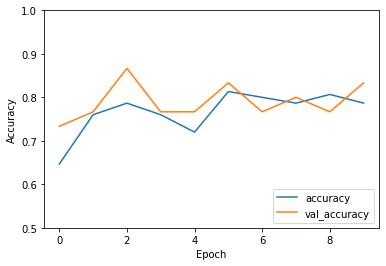

In [7]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

